### Import

In [46]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split

### Fonts

In [47]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Create Data

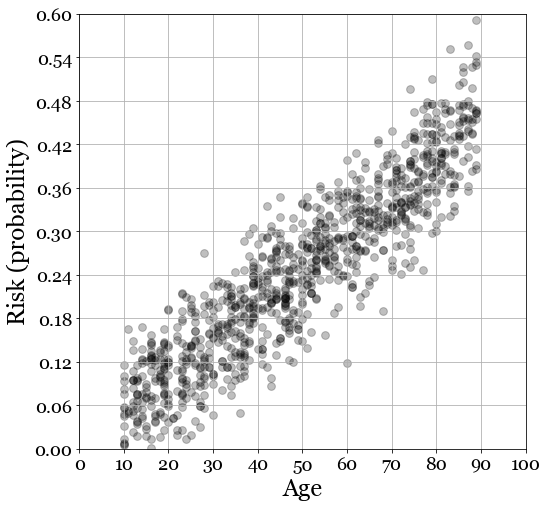

In [48]:
no_points = 1000
age = np.random.randint(10,90,(no_points,1))
noise = np.random.randn(no_points,1) * 0.05
cancer_risk = (age * 0.005) + noise

plt.figure(figsize=(8,8))
plt.scatter(age,cancer_risk,s=60,color='k',alpha=0.25)
plt.grid();
plt.axis((0,100,0,0.6));
plt.xticks(np.linspace(0,100,11),**csfont,fontsize=18);
plt.yticks(np.linspace(0,0.6,11),**csfont,fontsize=18);
plt.xlabel('Age',**csfont,fontsize=24);
plt.ylabel('Risk (probability)',**csfont,fontsize=24);
plt.savefig('../../assets/matplotlib/025_cancer_risk_age_risk.png', dpi=300,bbox_inches="tight")

### Divide the data into train and t

In [49]:
X_train, X_test, y_train, y_test = train_test_split(age, cancer_risk, test_size=0.33, random_state=42)

### To Tensorflow Tensors

In [50]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

### Create Tensorflow Model

In [51]:
risk_model = tf.keras.Sequential([
    layers.Dense(input_shape=[1], units=1)
])

### Define Optimizer

In [52]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.002,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam');

### Define the optimizer and compile the model

In [53]:
risk_model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')
risk_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Fit the Model

In [54]:
history = risk_model.fit(train_ds, verbose=1, batch_size=128,epochs=20, validation_data=test_ds)

Epoch 1/20
670/670 [==============================] - 1s 817us/step - loss: 0.2679 - val_loss: 0.0474
Epoch 2/20
670/670 [==============================] - 0s 720us/step - loss: 0.0643 - val_loss: 0.0894
Epoch 3/20
670/670 [==============================] - 1s 763us/step - loss: 0.0717 - val_loss: 0.0478
Epoch 4/20
670/670 [==============================] - 1s 798us/step - loss: 0.0650 - val_loss: 0.0422
Epoch 5/20
670/670 [==============================] - 1s 765us/step - loss: 0.0609 - val_loss: 0.0395
Epoch 6/20
670/670 [==============================] - 1s 745us/step - loss: 0.0619 - val_loss: 0.0394
Epoch 7/20
670/670 [==============================] - 0s 733us/step - loss: 0.0713 - val_loss: 0.0398
Epoch 8/20
670/670 [==============================] - 0s 740us/step - loss: 0.0688 - val_loss: 0.0514
Epoch 9/20
670/670 [==============================] - 0s 742us/step - loss: 0.0705 - val_loss: 0.1047
Epoch 10/20
670/670 [==============================] - 1s 747us/step - loss: 0.070

### Save

In [55]:
risk_model.save('../../models/025-tf-linear-regression-risk-model');

INFO:tensorflow:Assets written to: ../../models/025-tf-linear-regression-risk-model/assets


### Plot Loss during training epochs

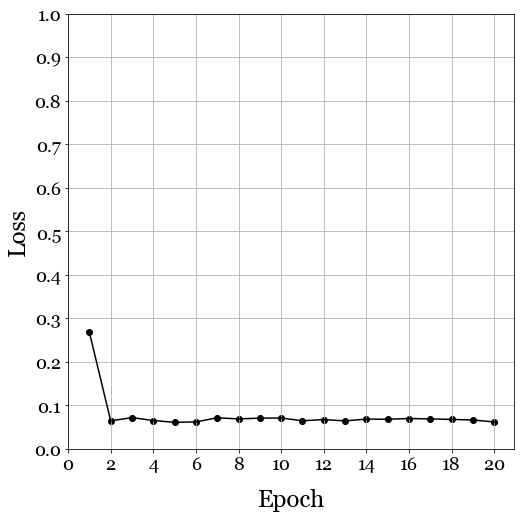

In [56]:
plt.figure(figsize=(8,8))
plt.plot(list(range(1,21)),history.history['loss'],c='k')
plt.scatter(list(range(1,21)),history.history['loss'],c='k')
plt.grid();
plt.xticks(np.linspace(0,20,11),**csfont,fontsize=18);
plt.yticks(np.linspace(0,np.ceil(np.max(history.history['loss'])),11),**csfont,fontsize=18);
plt.xlabel('Epoch',**csfont,fontsize=24,labelpad=15);
plt.ylabel('Loss',**csfont,fontsize=24);
plt.savefig('../../assets/matplotlib/25-tf-regression_1.png', dpi=300,bbox_inches="tight")    

### Predict and show result

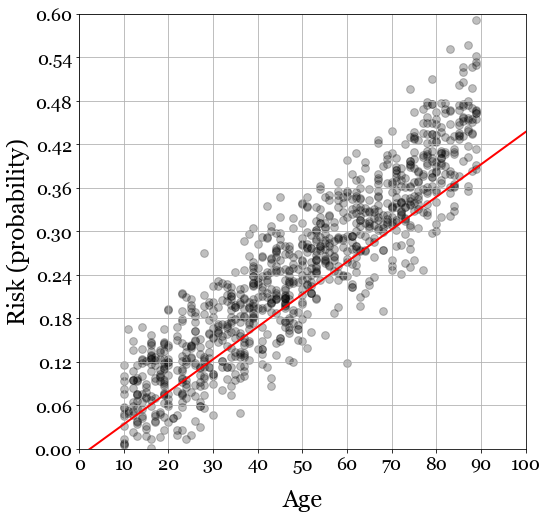

In [57]:
y_pred_0 = risk_model.predict([0])[0][0]
y_pred_1 = risk_model.predict([100])[0][0]
plt.figure(figsize=(8,8))
plt.scatter(age,cancer_risk,s=60,color='k',alpha=0.25)
plt.plot([0,100],[y_pred_0,y_pred_1],c='r',linewidth=2)
plt.grid();
plt.axis((0,100,0,0.6));
plt.xticks(np.linspace(0,100,11),**csfont,fontsize=18);
plt.yticks(np.linspace(0,0.6,11),**csfont,fontsize=18);
plt.xlabel('Age',**csfont,fontsize=24,labelpad=15);
plt.ylabel('Risk (probability)',**csfont,fontsize=24);
plt.savefig('../../assets/matplotlib/25-tf-regression_1.png', dpi=300,bbox_inches="tight")    